In [28]:
import numpy as np
import matplotlib.pyplot as plt

### Algorithm1

In [31]:
def leftmost_point(points):
    """
    Finds the leftmost point among the given points
    """
    return points[np.argmin(points[:, 0])]

def orientation(p, q, r):
    """
    To find orientation of ordered triplet (p, q, r).
    Returns positive for counterclockwise, negative for clockwise and zero for collinear
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2
    
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


In [37]:
def convexHullAlgo(points):
    """
    Given a set a points in 2D, finds the boundary points of the convex hull

    Parameters
    ----------
    points : ndarray of shape (n,2)
        The set of points in 2D
    
    Returns
    -------
    boundary_points : ndarray of shape (m,2)
        The set of points that make up the convex hull
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting. 
    """
    n = len(points)
    if n < 3:
        return points, None
    
    # Find the leftmost point
    leftmost = min(points, key=lambda p: p[0])
    hull = [leftmost]
    
    # Start with the leftmost point and keep adding the next point in the hull
    current = leftmost
    while True:
        next_point = None
        for point in points:
            if np.array_equal(point, current):  # Compare individual points
                continue
            if next_point is None:
                next_point = point
            orientation_val = orientation(current, next_point, point)
            if orientation_val == 2 or (orientation_val == 0 and distance(current, point) > distance(current, next_point)):
                next_point = point

        if np.array_equal(next_point, leftmost):
            break
        hull.append(next_point)
        current = next_point
    
    return np.array(hull), None


### Half Space based Algorithm or Any other Efficient Algorithm

In [75]:
def distance_point_line(point, p1, p2):
    x, y = point
    x1, y1 = p1
    x2, y2 = p2
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    distance = abs(slope * x - y + intercept) / np.sqrt(slope**2 + 1)
    return distance

In [78]:
def convexHullEfficient(points):
    """
    Given a set a points in 2D, finds the boundary points of the convex hull using the QuickHull algorithm

    Parameters
    ----------
    points : ndarray of shape (n,2)
        The set of points in 2D
    
    Returns
    -------
    boundary_points : ndarray of shape (m,2)
        The set of points that make up the convex hull
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting. 
    """
    def find_hull(points, p1, p2):
        
        if len(points) == 0:
            return []
        
        # Find the point with maximum distance from the line segment
        max_dist = 0
        max_point = None
        for point in points:
            dist = distance_point_line(point, p1, p2)
            if dist > max_dist:
                max_dist = dist
                max_point = point
        
        if max_point is None:
            return []
        
        # Divide the points into two sets: points to the left of the line segment and points to the right
        left_points = []
        right_points = []
        for point in points:
            if not np.array_equal(point, max_point):
                if orientation(p1, max_point, point) == 2:
                    left_points.append(point)
                elif orientation(max_point, p2, point) == 2:
                    right_points.append(point)
        
        # Recursively find the convex hull for the left and right sets of points
        left_hull = find_hull(left_points, p1, max_point)
        right_hull = find_hull(right_points, max_point, p2)
        
        # Combine the hulls
        hull = [p1] + left_hull + [max_point] + right_hull + [p2]
        return hull
    
    # Find the leftmost and rightmost points
    leftmost = min(points, key=lambda p: p[0])
    rightmost = max(points, key=lambda p: p[0])
    
    # Find the convex hull recursively
    hull = find_hull(points, leftmost, rightmost)
    
    return np.array(hull), None
    

### Plotting and Visualization

In [82]:
def plotConvexHull(points, boundary_points, cache=None):
    """
    Plots the convex hull of a set of points in 2D

    Parameters
    ----------
    points : ndarray of shape (n,2)
        The set of points in 2D
    boundary_points : ndarray of shape (m,2)
        The set of points that make up the convex hull
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting. 
    
    Returns
    -------
    None
    """
    # Plot the points
    plt.scatter(points[:,0],points[:,1],label='Points')
    # Plot the boundary points
    plt.plot(boundary_points[:,0],boundary_points[:,1],label='Convex Hull',color='r')
    # Connect the last point to the first point to form a closed polygon
    plt.plot([boundary_points[-1,0], boundary_points[0,0]], [boundary_points[-1,1], boundary_points[0,1]], color='r')
    # Plot the cache
    if cache is not None:
        for i in range(len(cache['upper_hull'])):
            plt.plot(np.array(cache['upper_hull'][i])[:,0],np.array(cache['upper_hull'][i])[:,1],color='g',alpha=0.5)
            plt.plot(np.array(cache['lower_hull'][i])[:,0],np.array(cache['lower_hull'][i])[:,1],color='b',alpha=0.5)
    # Show the plot
    plt.legend()
    plt.show()

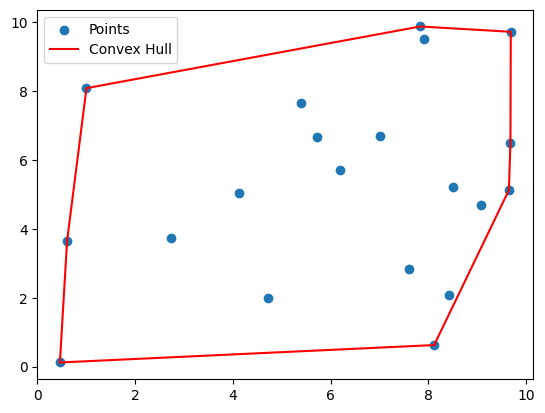

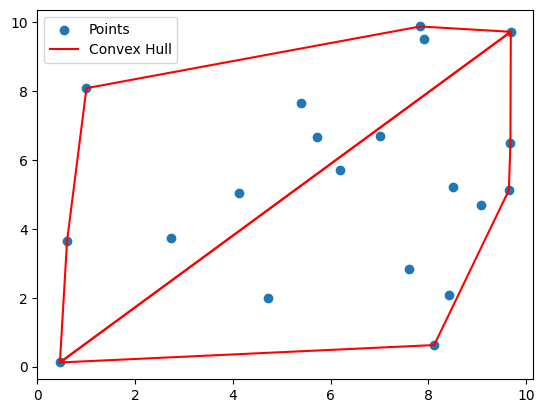

In [85]:
# Test the Jarvis March algorithm
points = np.random.rand(20, 2) * 10  # Generate random points
hull, cache = convexHullAlgo(points)
plotConvexHull(points, hull,cache)
hulleff, cache = convexHullEfficient(points)
plotConvexHull(points, hulleff,cache)
